In [2]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [3]:
# FIX
# FRONTS OF SIZE ONE HAVE A NON ZERO NORM D-SCORE

In [5]:
R_1_0 = pd.json_normalize(json.load(open("1.0-NY-RANDOM.json"))["data"])
R_0_5 = pd.json_normalize(json.load(open("0.5-NY-RANDOM.json"))["data"])
R_0_1 = pd.json_normalize(json.load(open("0.1-NY-RANDOM.json"))["data"])
R_0_01 = pd.json_normalize(json.load(open("0.01-NY-RANDOM.json"))["data"])
R_0_001 = pd.json_normalize(json.load(open("0.001-NY-RANDOM.json"))["data"])
R_0_0001 = pd.json_normalize(json.load(open("0.0001-NY-RANDOM.json"))["data"])

MS_1_0 = pd.json_normalize(json.load(open("1.0-NY-MORE_SLACK.json"))["data"])
MS_0_5 = pd.json_normalize(json.load(open("0.5-NY-MORE_SLACK.json"))["data"])
MS_0_1 = pd.json_normalize(json.load(open("0.1-NY-MORE_SLACK.json"))["data"])
MS_0_01 = pd.json_normalize(json.load(open("0.01-NY-MORE_SLACK.json"))["data"])
MS_0_001 = pd.json_normalize(json.load(open("0.001-NY-MORE_SLACK.json"))["data"])
MS_0_0001 = pd.json_normalize(json.load(open("0.0001-NY-MORE_SLACK.json"))["data"])

In [6]:
#front must be a 2d matrix
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [7]:
def DF_HV(df):
    fronts = df["front"].to_list()
    HV = []
    for front in fronts:
        HV.append(front_hv(front))
    return HV

In [8]:
# Hypervolumen
R_1_0_hv = DF_HV(R_1_0)
R_0_5_hv = DF_HV(R_0_5)
R_0_1_hv = DF_HV(R_0_1)
R_0_01_hv = DF_HV(R_0_01)
R_0_001_hv = DF_HV(R_0_001)
R_0_0001_hv = DF_HV(R_0_0001)

MS_1_0_hv = DF_HV(MS_1_0)
MS_0_5_hv = DF_HV(MS_0_5)
MS_0_1_hv = DF_HV(MS_0_1)
MS_0_01_hv = DF_HV(MS_0_01)
MS_0_001_hv = DF_HV(MS_0_001)
MS_0_0001_hv = DF_HV(MS_0_0001)

In [9]:
# Avg Hypervolume
R_1_0_hv_avg = np.mean(R_1_0_hv)
R_0_5_hv_avg = np.mean(R_0_5_hv)
R_0_1_hv_avg = np.mean(R_0_1_hv)
R_0_01_hv_avg = np.mean(R_0_01_hv)
R_0_001_hv_avg = np.mean(R_0_001_hv)
R_0_0001_hv_avg = np.mean(R_0_0001_hv)

MS_1_0_hv_avg = np.mean(MS_1_0_hv)
MS_0_5_hv_avg = np.mean(MS_0_5_hv)
MS_0_1_hv_avg = np.mean(MS_0_1_hv)
MS_0_01_hv_avg = np.mean(MS_0_01_hv)
MS_0_001_hv_avg = np.mean(MS_0_001_hv)
MS_0_0001_hv_avg = np.mean(MS_0_0001_hv)

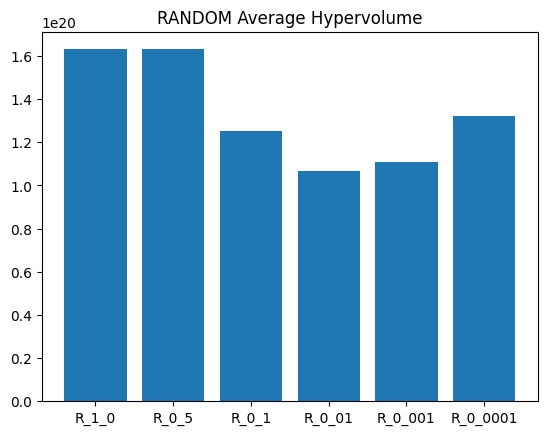

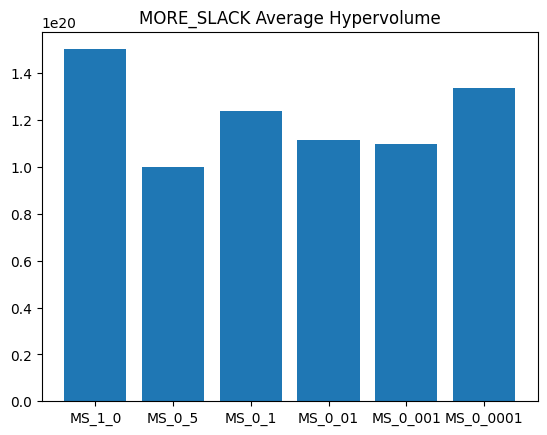

In [10]:
Col = [
"R_1_0", 
"R_0_5",
"R_0_1",
"R_0_01",
"R_0_001",
"R_0_0001"]
Val = [
R_1_0_hv_avg, 
R_0_5_hv_avg,
R_0_1_hv_avg,
R_0_01_hv_avg,
R_0_001_hv_avg,
R_0_0001_hv_avg]

plt.bar(Col,Val)
plt.title("RANDOM Average Hypervolume")
# plt.yscale("log")
plt.show()

Col = [
"MS_1_0", 
"MS_0_5",
"MS_0_1",
"MS_0_01",
"MS_0_001",
"MS_0_0001"]
Val = [
MS_1_0_hv_avg, 
MS_0_5_hv_avg,
MS_0_1_hv_avg,
MS_0_01_hv_avg,
MS_0_001_hv_avg,
MS_0_0001_hv_avg]

plt.bar(Col,Val)
plt.title("MORE_SLACK Average Hypervolume")
#plt.yscale("log")
plt.show()


In [11]:
print("RANDOM Avg Hypervolume")
print("1.0:    ", R_1_0_hv_avg)
print("0.5     ", R_0_5_hv_avg)
print("0.1     ", R_0_1_hv_avg)
print("0.01:   ", R_0_01_hv_avg)
print("0.001:  " ,R_0_001_hv_avg)
print("0.0001: ", R_0_0001_hv_avg)

print("-----")

print("MORE_SLACK Avg Hypervolume")
print("1.0:    ", MS_1_0_hv_avg)
print("0.5     ", MS_0_5_hv_avg)
print("0.1     ", MS_0_1_hv_avg)
print("0.01:   ", MS_0_01_hv_avg)
print("0.001:  " ,MS_0_001_hv_avg)
print("0.0001: ", MS_0_0001_hv_avg)

RANDOM Avg Hypervolume
1.0:     1.6300962614811214e+20
0.5      1.6304300404905607e+20
0.1      1.251886802095733e+20
0.01:    1.0649141720727473e+20
0.001:   1.109966687987401e+20
0.0001:  1.3231185656421623e+20
-----
MORE_SLACK Avg Hypervolume
1.0:     1.501669884598586e+20
0.5      1.0008487815950017e+20
0.1      1.2400203936075948e+20
0.01:    1.1166392430281812e+20
0.001:   1.0968718115082096e+20
0.0001:  1.3350340528859744e+20


In [12]:
R_1_0_sparsity = R_1_0["sparsity"].to_list()
R_0_5_sparsity = R_0_5["sparsity"].to_list()
R_0_1_sparsity = R_0_1["sparsity"].to_list()
R_0_01_sparsity = R_0_01["sparsity"].to_list()
R_0_001_sparsity = R_0_001["sparsity"].to_list()
R_0_0001_sparsity = R_0_0001["sparsity"].to_list()

MS_1_0_sparsity = MS_1_0["sparsity"].to_list()
MS_0_5_sparsity = MS_0_5["sparsity"].to_list()
MS_0_1_sparsity = MS_0_1["sparsity"].to_list()
MS_0_01_sparsity = MS_0_01["sparsity"].to_list()
MS_0_001_sparsity = MS_0_001["sparsity"].to_list()
MS_0_0001_sparsity = MS_0_0001["sparsity"].to_list()

In [13]:
R_1_0_sparsity_avg = np.mean(R_1_0_sparsity)
R_0_5_sparsity_avg = np.mean(R_0_5_sparsity)
R_0_1_sparsity_avg = np.mean(R_0_1_sparsity)
R_0_01_sparsity_avg = np.mean(R_0_01_sparsity)
R_0_001_sparsity_avg = np.mean(R_0_001_sparsity)
R_0_0001_sparsity_avg = np.mean(R_0_0001_sparsity)

MS_1_0_sparsity_avg = np.mean(MS_1_0_sparsity)
MS_0_5_sparsity_avg = np.mean(MS_0_5_sparsity)
MS_0_1_sparsity_avg = np.mean(MS_0_1_sparsity)
MS_0_01_sparsity_avg = np.mean(MS_0_01_sparsity)
MS_0_001_sparsity_avg = np.mean(MS_0_001_sparsity)
MS_0_0001_sparsity_avg = np.mean(MS_0_0001_sparsity)

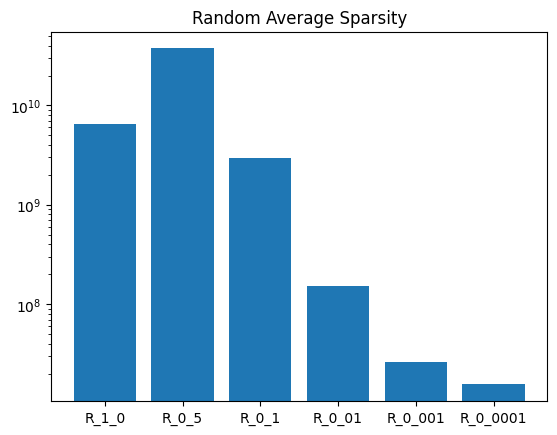

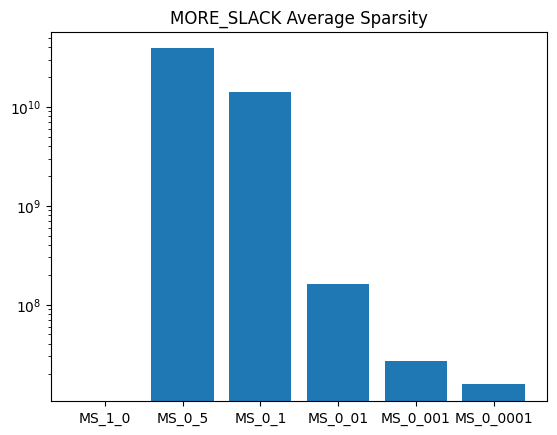

In [14]:
# Average Sparsity
Col = [
"R_1_0", 
"R_0_5",
"R_0_1",
"R_0_01",
"R_0_001",
"R_0_0001"]
Val = [
R_1_0_sparsity_avg, 
R_0_5_sparsity_avg,
R_0_1_sparsity_avg,
R_0_01_sparsity_avg,
R_0_001_sparsity_avg,
R_0_0001_sparsity_avg]

plt.bar(Col,Val)
plt.title("Random Average Sparsity")
plt.yscale("log")
plt.show()


Col = [
"MS_1_0", 
"MS_0_5",
"MS_0_1",
"MS_0_01",
"MS_0_001",
"MS_0_0001"]
Val = [
MS_1_0_sparsity_avg, 
MS_0_5_sparsity_avg,
MS_0_1_sparsity_avg,
MS_0_01_sparsity_avg,
MS_0_001_sparsity_avg,
MS_0_0001_sparsity_avg]

plt.bar(Col,Val)
plt.title("MORE_SLACK Average Sparsity")
plt.yscale("log")
plt.show()

In [15]:
print("Merge Method: Random Avg Sparsity")
print("1.0:    ", R_1_0_sparsity_avg)
print("0.5     ", R_0_5_sparsity_avg)
print("0.1     ", R_0_1_sparsity_avg)
print("0.01:   ", R_0_01_sparsity_avg)
print("0.001:  " ,R_0_001_sparsity_avg)
print("0.0001: ", R_0_0001_sparsity_avg)

print("-----")

print("Merge Method: MORE_SLACK Avg Sparsity")
print("1.0:    ", MS_1_0_sparsity_avg)
print("0.5     ", MS_0_5_sparsity_avg)
print("0.1     ", MS_0_1_sparsity_avg)
print("0.01:   ", MS_0_01_sparsity_avg)
print("0.001:  " ,MS_0_001_sparsity_avg)
print("0.0001: ", MS_0_0001_sparsity_avg)

Merge Method: Random Avg Sparsity
1.0:     6485000000.0
0.5      37425290000.0
0.1      2991689908.0
0.01:    151672381.6
0.001:   25959579.92
0.0001:  15576107.724000001
-----
Merge Method: MORE_SLACK Avg Sparsity
1.0:     0.0
0.5      38971592000.0
0.1      14182320920.0
0.01:    163073878.96
0.001:   26727331.04
0.0001:  15593826.664


In [16]:
# time
R_1_0_time = R_1_0["time"].to_list()
R_0_5_time = R_0_5["time"].to_list()
R_0_1_time = R_0_1["time"].to_list()
R_0_01_time = R_0_01["time"].to_list()
R_0_001_time = R_0_001["time"].to_list()
R_0_0001_time = R_0_0001["time"].to_list()

MS_1_0_time = MS_1_0["time"].to_list()
MS_0_5_time = MS_0_5["time"].to_list()
MS_0_1_time = MS_0_1["time"].to_list()
MS_0_01_time = MS_0_01["time"].to_list()
MS_0_001_time = MS_0_001["time"].to_list()
MS_0_0001_time = MS_0_0001["time"].to_list()

In [17]:
print("Random avg 1.00 runtime:  ", np.mean(R_1_0_time), "ms")
print("Random avg 0.50 runtime:  ", np.mean(R_0_5_time), "ms")
print("Random avg 0.10 runtime:  ", np.mean(R_0_1_time), "ms")
print("Random avg 0.01 runtime:  ", np.mean(R_0_001_time), "ms")
print("Random avg 0.001 runtime: ", np.mean(R_0_0001_time), "ms")

print("-----")

print("Random avg 1.00 runtime:  ", np.mean(MS_1_0_time), "ms")
print("Random avg 0.50 runtime:  ", np.mean(MS_0_5_time), "ms")
print("Random avg 0.10 runtime:  ", np.mean(MS_0_1_time), "ms")
print("Random avg 0.01 runtime:  ", np.mean(MS_0_001_time), "ms")
print("Random avg 0.001 runtime: ", np.mean(MS_0_0001_time), "ms")

Random avg 1.00 runtime:   703.04 ms
Random avg 0.50 runtime:   6675.36 ms
Random avg 0.10 runtime:   88461.36 ms
Random avg 0.01 runtime:   189534.2 ms
Random avg 0.001 runtime:  397811.04 ms
-----
Random avg 1.00 runtime:   260.08 ms
Random avg 0.50 runtime:   1536.28 ms
Random avg 0.10 runtime:   30954.8 ms
Random avg 0.01 runtime:   190059.32 ms
Random avg 0.001 runtime:  211805.4 ms


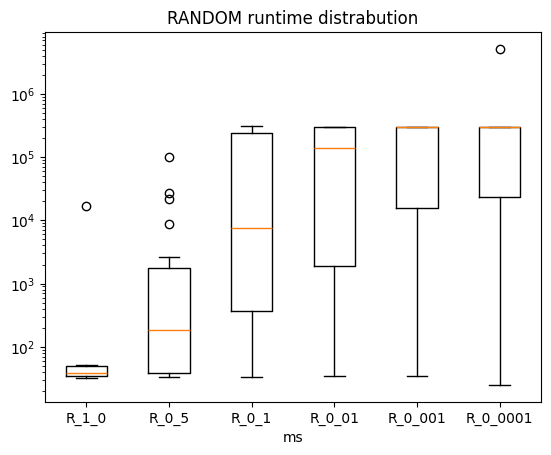

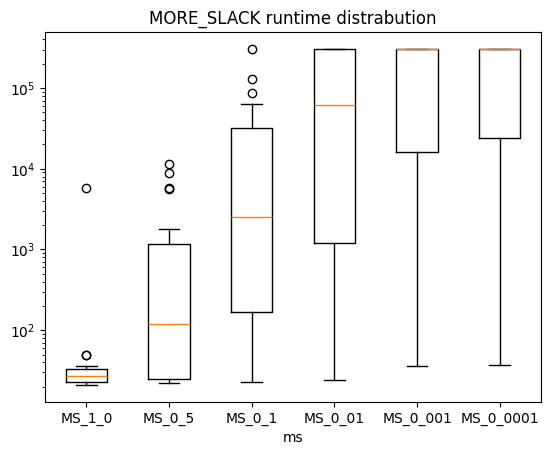

In [18]:
label = ["R_1_0", "R_0_5", "R_0_1", "R_0_01", "R_0_001", "R_0_0001"]
runtimes = [R_1_0_time, R_0_5_time, R_0_1_time, R_0_01_time, R_0_001_time, R_0_0001_time]

plt.boxplot(runtimes, tick_labels=label)
plt.yscale("log")
plt.xlabel("ms")
plt.title("RANDOM runtime distrabution")
plt.show()

label = ["MS_1_0", "MS_0_5", "MS_0_1", "MS_0_01", "MS_0_001", "MS_0_0001"]
runtimes = [MS_1_0_time, MS_0_5_time, MS_0_1_time, MS_0_01_time, MS_0_001_time, MS_0_0001_time]

plt.boxplot(runtimes, tick_labels=label)
plt.yscale("log")
plt.xlabel("ms")
plt.title("MORE_SLACK runtime distrabution")
plt.show()